In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from google.colab import files
import math
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anujj55","key":"c9bebadf13d16411922bbabbd902b54d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p "/content/drive/My Drive/Plant_Disease_Dataset/"

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:04<00:00, 21.9MB/s]
100% 2.70G/2.70G [02:04<00:00, 23.2MB/s]


In [ ]:
!unzip "/content/drive/My Drive/Plant_Disease_Dataset/new-plant-diseases-dataset.zip" -d "/content/drive/My Drive/Plant_Disease_Dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/drive/My Drive/Plant_Disease

In [ ]:
!ls "/content/drive/My Drive/Plant_Disease_Dataset/"


'new plant diseases dataset(augmented)'   new-plant-diseases-dataset.zip
'New Plant Diseases Dataset(Augmented)'   test


In [ ]:
ds_path="/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)"

In [ ]:
print(os.listdir(ds_path))

['New Plant Diseases Dataset(Augmented)']


In [ ]:
print(os.listdir("/content/drive/My Drive/Plant_Disease_Dataset/"))


print(len(os.listdir("/content/drive/My Drive/Plant_Disease_Dataset/New Plant Diseases Dataset(Augmented)")))
print(os.listdir("/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train")[:4])

print(len(os.listdir("/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid")))
print(os.listdir("/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid")[:4])

['new-plant-diseases-dataset.zip', 'New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
1
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [ ]:
dataset_path = "/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy"

print(len(os.listdir(dataset_path)))
print(os.listdir(dataset_path)[:5])

2008
['0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG', '00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG', '00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709_flipTB.JPG', '0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG', '00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.JPG']


In [ ]:
base_dir = '/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'
print(os.listdir(base_dir))


['train', 'valid']


(256, 256, 3)


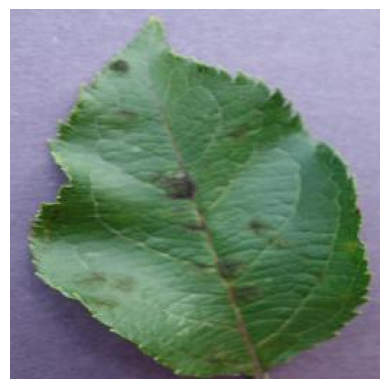

In [ ]:
image_path = '/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [ ]:
dataset_path = "/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
img_height, img_width = 224, 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, image_size=(img_height, img_width), batch_size=32
)

class_names = train_ds.class_names
print(class_names)

Found 87867 files belonging to 2 classes.
['train', 'valid']


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
train_generator = datagen.flow_from_directory(
    "/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 70295 images belonging to 38 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    "/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
     target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 17572 images belonging to 38 classes.


In [ ]:
img_size = 224
batch_size = 32

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 2197/70295 ━━━━━━━━━━━━━━━━━━━━ 2:49:09 149ms/step - accuracy: 0.6043 - loss: 1.5163

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


70295/70295 ━━━━━━━━━━━━━━━━━━━━ 411s 6ms/step - accuracy: 0.7532 - loss: 0.8507 - val_accuracy: 0.8777 - val_loss: 0.3834
Epoch 2/5
70295/70295 ━━━━━━━━━━━━━━━━━━━━ 388s 5ms/step - accuracy: 0.9315 - loss: 0.2085 - val_accuracy: 0.8847 - val_loss: 0.3782
Epoch 3/5
70295/70295 ━━━━━━━━━━━━━━━━━━━━ 351s 5ms/step - accuracy: 0.9652 - loss: 0.1051 - val_accuracy: 0.8901 - val_loss: 0.3851
Epoch 4/5
70295/70295 ━━━━━━━━━━━━━━━━━━━━ 343s 5ms/step - accuracy: 0.9753 - loss: 0.0752 - val_accuracy: 0.8953 - val_loss: 0.4349
Epoch 5/5
70295/70295 ━━━━━━━━━━━━━━━━━━━━ 352s 5ms/step - accuracy: 0.9792 - loss: 0.0661 - val_accuracy: 0.8899 - val_loss: 0.4812


In [ ]:
model.save("/content/drive/My Drive/cnn.keras")

In [ ]:
!ls "/content/drive/My Drive"

 cnn.keras	   'Congress tasks (Responses).gsheet'	'Photos (1)'
 Codes		   'Contact Information.gform'		 Plant_Disease_Dataset
'Colab Notebooks'   Photos				'Untitled spreadsheet.gsheet'


In [ ]:
valid_path="/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

Found 17572 files belonging to 38 classes.


In [ ]:
steps = math.ceil(validation_generator.samples / batch_size)
val_loss, val_accuracy = model.evaluate(validation_generator, steps=steps)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

550/550 ━━━━━━━━━━━━━━━━━━━━ 68s 124ms/step - accuracy: 0.8913 - loss: 0.4738
Validation Accuracy: 88.99%


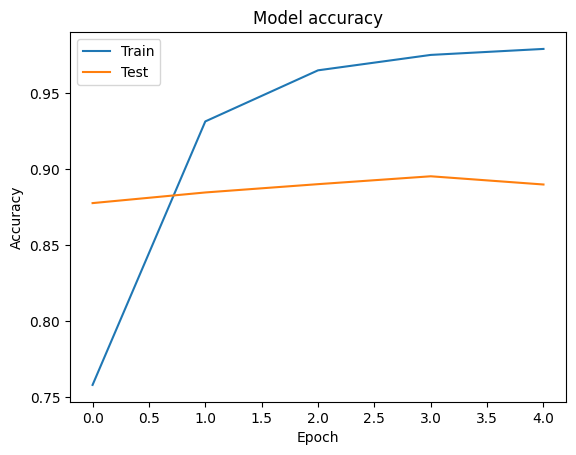

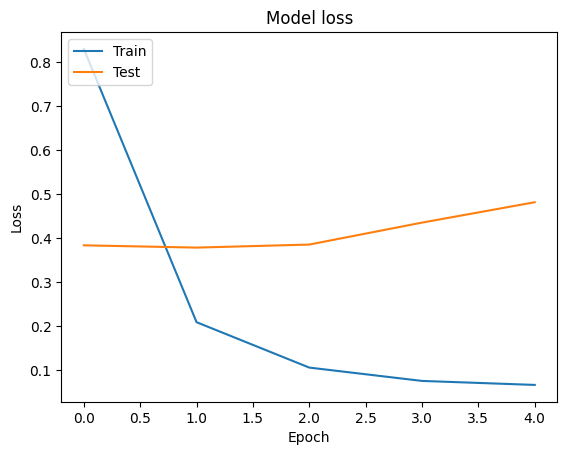

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
    image_size=(224, 224),
    batch_size=batch_size
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Plant_Disease_Dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
    image_size=(224, 224),
    batch_size=batch_size
)


Found 1785 files belonging to 38 classes.
Found 75 files belonging to 38 classes.


In [ ]:
class_names = train_ds.class_names
class_indices = {i: name for i, name in enumerate(class_names)}

print(class_indices)


{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [ ]:
model = tf.keras.models.load_model("/content/drive/My Drive/cnn.keras")
image_path = "/content/drive/My Drive/Plant_Disease_Dataset/test/test/TomatoEarlyBlight2.JPG"
predicted_class = predict_image_class(model, image_path, class_indices)
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
Predicted Class: Tomato___Early_blight
